In [2]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)


Using TensorFlow backend.


In [3]:
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
import os
from keras.callbacks import TensorBoard
ENCODE_DIR = os.getcwd()
tensorboard = TensorBoard(log_dir='ENCODE_DIR', histogram_freq=0,
                         write_graph=True, write_images=False)

In [5]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc=TensorBoardColab()

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

Wait for 8 seconds...
TensorBoard link:
https://388b8f03b4b6.ngrok.io


In [6]:
history=autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.5408 - val_loss: 0.4632
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.4309 - val_loss: 0.4066
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3985 - val_loss: 0.3856
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3817 - val_loss: 0.3695
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3685 - val_loss: 0.3563
Epoch 6/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3581 - val_loss: 0.3461
Epoch 7/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3503 - val_loss: 0.3383
Epoch 8/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3443 - val_loss: 0.3321
Epoch 9/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3396 - val_loss: 0.3270
Epoch

In [7]:
prediction = autoencoder.predict(x_test_noisy)

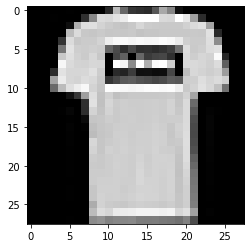

In [16]:
from matplotlib import pyplot as plt
plt.imshow(x_train[1].reshape(28,28))
plt.gray()
plt.show()

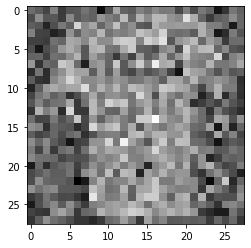

In [17]:
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[1].reshape(28,28))
plt.show()

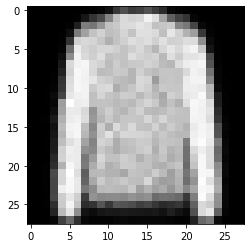

In [18]:
from matplotlib import pyplot as plt
plt.imshow(prediction[1].reshape(28,28))
plt.show()

Text(0.5, 1.0, 'Loss Curves : ')

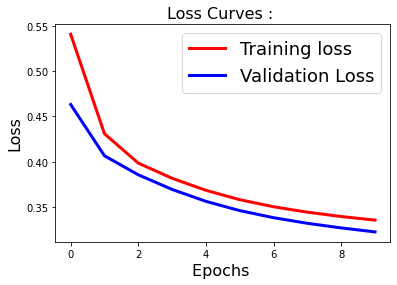

In [11]:
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves : ', fontsize=16)